In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("online_retail_cleaned.csv")

df.head()
df.shape


(805549, 11)

In [4]:
df["order_date"]  = pd.to_datetime(df["order_date"])

In [5]:
df.head()

,order_id,product_id,product_name,quantity,order_date,unit_price,customer_id,country,revenue,order_month,order_year
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4,2009-12,2009
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009-12,2009
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0,2009-12,2009
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8,2009-12,2009
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0,2009-12,2009


In [6]:
df.describe()

,order_id,quantity,order_date,unit_price,customer_id,revenue,order_year
count,805549.000000,805549.000000,805549,805549.000000,805549.000000,805549.000000,805549.000000
mean,537410.713358,13.290522,2011-01-02 10:24:44.106814464,3.206561,15331.954970,22.026505,2010.423282
min,489434.000000,1.000000,2009-12-01 07:45:00,0.001000,12346.000000,0.001000,2009.000000
25%,514962.000000,2.000000,2010-07-07 12:08:00,1.250000,13982.000000,4.950000,2010.000000
50%,536989.000000,5.000000,2010-12-03 15:10:00,1.950000,15271.000000,11.850000,2010.000000
75%,561617.000000,12.000000,2011-07-28 13:05:00,3.750000,16805.000000,19.500000,2011.000000
max,581587.000000,80995.000000,2011-12-09 12:50:00,10953.500000,18287.000000,168469.600000,2011.000000
std,26666.068909,143.634088,NaN,29.199173,1696.737039,224.041928,0.566101


In [7]:
df.isnull().sum()

order_id        0
product_id      0
product_name    0
quantity        0
order_date      0
unit_price      0
customer_id     0
country         0
revenue         0
order_month     0
order_year      0
dtype: int64

In [8]:
total_revenue = df["revenue"].sum()
total_customers = df["customer_id"].nunique()
total_orders = df["order_id"].nunique()

total_revenue, total_customers, total_orders


(np.float64(17743429.178000003), 5878, 36969)

Total revenue 

Avg revenue per customer

Avg orders per customer

In [9]:
avg_rev_per_customer = total_revenue / total_customers
avg_orders_per_customer = total_orders / total_customers

avg_rev_per_customer ,avg_orders_per_customer


(np.float64(3018.6167366451177), 6.289384144266758)

Customer-Level Aggregation (IMPORTANT)

In [22]:
customer_df = (
    df.groupby("customer_id")
      .agg(
          total_orders=("order_id", "nunique"),
          total_revenue=("revenue", "sum"),
          avg_order_value=("revenue", "mean"),
          first_purchase=("order_date", "min"),
          last_purchase=("order_date", "max")
      )
      .reset_index()
)

customer_df.head()


,customer_id,total_orders,total_revenue,avg_order_value,first_purchase,last_purchase
0,12346.0,12,77556.46,2281.072353,2009-12-14 08:34:00,2011-01-18 10:01:00
1,12347.0,8,5633.32,22.266087,2010-10-31 14:20:00,2011-12-07 15:52:00
2,12348.0,5,2019.40,39.596078,2010-09-27 14:59:00,2011-09-25 13:13:00
3,12349.0,4,4428.69,25.306800,2010-04-29 13:20:00,2011-11-21 09:51:00
4,12350.0,1,334.40,19.670588,2011-02-02 16:01:00,2011-02-02 16:01:00


Recency Feature (Churn Signal)

In [23]:
df["order_date"]  = pd.to_datetime(df["order_date"])

In [24]:
reference_date = df["order_date"].max()

customer_df["recency_days"] = (
    reference_date - customer_df["last_purchase"]
).dt.days


Distribution Analysis (EDA)

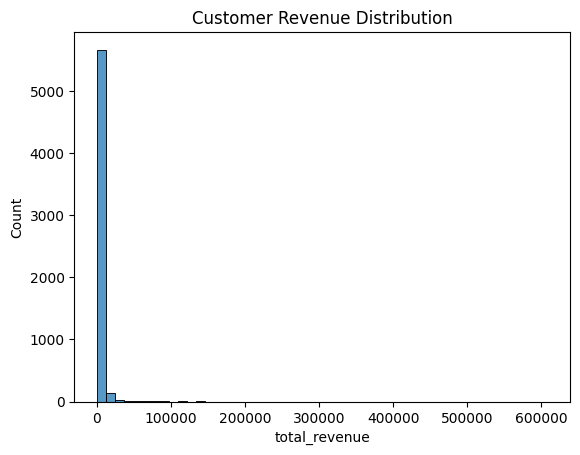

In [25]:
sns.histplot(customer_df["total_revenue"], bins=50)
plt.title("Customer Revenue Distribution")
plt.show()


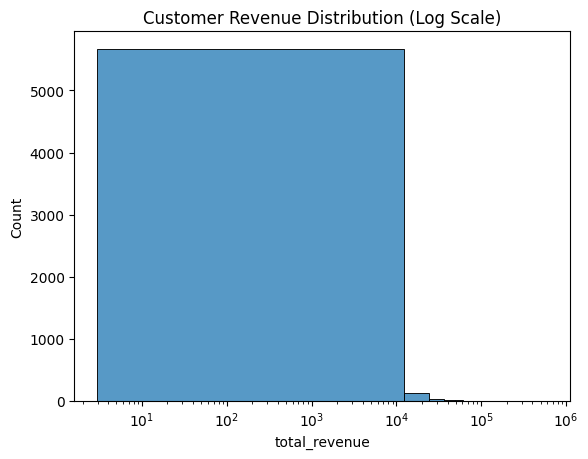

In [26]:
sns.histplot(customer_df["total_revenue"], bins=50)
plt.xscale("log")
plt.title("Customer Revenue Distribution (Log Scale)")
plt.show()


In [15]:
# STEP 5: Distribution Analysis (EDA)
# Revenue Distribution

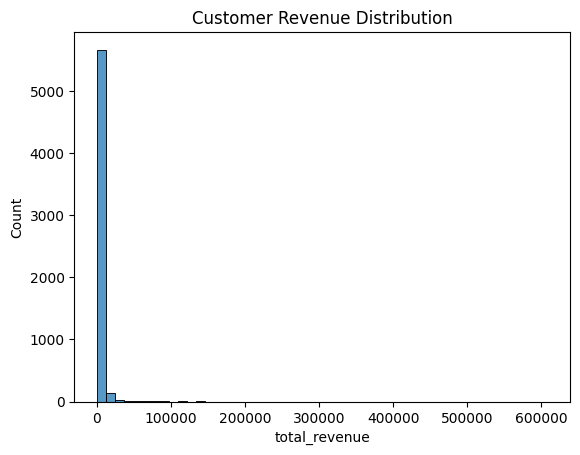

In [27]:
sns.histplot(customer_df["total_revenue"], bins=50)
plt.title("Customer Revenue Distribution")
plt.show()


In [ ]:
# Observation:-

# Long-tail distribution
# Few customers contribute most revenue

In [32]:
customer_df["total_revenue"].max()

np.float64(608821.65)

In [29]:
import pandas as pd

# Create 50 bins
customer_df["revenue_bin"] = pd.cut(customer_df["total_revenue"], bins=50)


In [33]:
# Count customers in each bin
bin_counts = customer_df["revenue_bin"].value_counts().sort_index()
bin_counts

revenue_bin
(-605.869, 12179.324]       5667
(12179.324, 24355.698]       134
(24355.698, 36532.072]        30
(36532.072, 48708.446]        12
(48708.446, 60884.82]          9
(60884.82, 73061.194]          5
(73061.194, 85237.568]         3
(85237.568, 97413.942]         3
(97413.942, 109590.316]        0
(109590.316, 121766.69]        3
(121766.69, 133943.064]        1
(133943.064, 146119.438]       2
(146119.438, 158295.812]       1
(158295.812, 170472.186]       1
(170472.186, 182648.56]        1
(182648.56, 194824.934]        0
(194824.934, 207001.308]       1
(207001.308, 219177.682]       0
(219177.682, 231354.056]       0
(231354.056, 243530.43]        0
(243530.43, 255706.804]        1
(255706.804, 267883.178]       0
(267883.178, 280059.552]       0
(280059.552, 292235.926]       0
(292235.926, 304412.3]         1
(304412.3, 316588.674]         1
(316588.674, 328765.048]       0
(328765.048, 340941.422]       0
(340941.422, 353117.796]       0
(353117.796, 365294.17]        

Orders Distribution

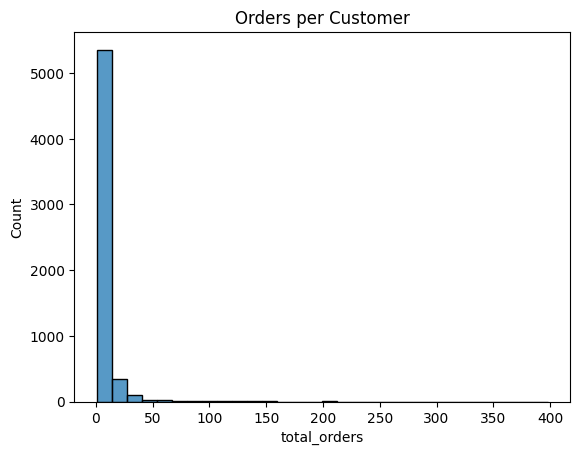

In [35]:
sns.histplot(customer_df["total_orders"], bins=30)
plt.title("Orders per Customer")
plt.show()


Pareto Analysis (80/20 Rule) ⭐

In [54]:
customer_df.drop(["cum_rev","Total_sum","cum_rev_pct"], axis = 1, inplace=True)

In [55]:
customer_df

,customer_id,total_orders,total_revenue,avg_order_value,first_purchase,last_purchase,recency_days,revenue_bin
1730,14095.0,1,2.95,2.950000,2009-12-17 12:49:00,2009-12-17 12:49:00,722,"(-605.869, 12179.324]"
1424,13788.0,1,3.75,3.750000,2010-07-22 15:50:00,2010-07-22 15:50:00,504,"(-605.869, 12179.324]"
4348,16738.0,1,3.75,3.750000,2011-02-15 09:46:00,2011-02-15 09:46:00,297,"(-605.869, 12179.324]"
2421,14792.0,1,6.20,3.100000,2011-10-07 09:19:00,2011-10-07 09:19:00,63,"(-605.869, 12179.324]"
3532,15913.0,1,6.30,6.300000,2010-06-23 16:31:00,2010-06-23 16:31:00,533,"(-605.869, 12179.324]"
...,...,...,...,...,...,...,...,...
5050,17450.0,51,246973.09,582.483703,2010-09-27 16:59:00,2011-12-01 13:29:00,7,"(243530.43, 255706.804]"
2538,14911.0,398,295972.63,26.320376,2009-12-01 11:41:00,2011-12-08 15:54:00,0,"(292235.926, 304412.3]"
1789,14156.0,156,313946.37,77.555921,2009-12-01 12:30:00,2011-11-30 10:54:00,9,"(304412.3, 316588.674]"
2277,14646.0,151,528602.52,137.335027,2009-12-02 16:52:00,2011-12-08 12:12:00,1,"(523587.032, 535763.406]"


In [57]:
customer_df = customer_df.sort_values("total_revenue", ascending=False)
customer_df["cum_revenue_pct"] = (
    customer_df["total_revenue"].cumsum() / customer_df["total_revenue"].sum()
)

customer_df.head(10)

,customer_id,total_orders,total_revenue,avg_order_value,first_purchase,last_purchase,recency_days,revenue_bin,cum_revenue_pct
5692,18102.0,145,608821.65,575.445794,2009-12-01 09:24:00,2011-12-09 11:50:00,0,"(596645.276, 608821.65]",0.034313
2277,14646.0,151,528602.52,137.335027,2009-12-02 16:52:00,2011-12-08 12:12:00,1,"(523587.032, 535763.406]",0.064104
1789,14156.0,156,313946.37,77.555921,2009-12-01 12:30:00,2011-11-30 10:54:00,9,"(304412.3, 316588.674]",0.081798
2538,14911.0,398,295972.63,26.320376,2009-12-01 11:41:00,2011-12-08 15:54:00,0,"(292235.926, 304412.3]",0.098478
5050,17450.0,51,246973.09,582.483703,2010-09-27 16:59:00,2011-12-01 13:29:00,7,"(243530.43, 255706.804]",0.112397
1331,13694.0,143,196482.81,128.841187,2009-12-04 15:26:00,2011-12-06 09:32:00,3,"(194824.934, 207001.308]",0.123471
5109,17511.0,60,175603.55,91.890921,2009-12-02 10:52:00,2011-12-07 10:12:00,2,"(170472.186, 182648.56]",0.133368
4061,16446.0,2,168472.50,56157.500000,2011-05-18 09:52:00,2011-12-09 09:15:00,0,"(158295.812, 170472.186]",0.142863
4295,16684.0,55,147142.77,204.934220,2009-12-07 12:56:00,2011-12-05 14:06:00,3,"(146119.438, 158295.812]",0.151156
68,12415.0,28,144458.37,156.002559,2010-06-30 08:30:00,2011-11-15 14:22:00,23,"(133943.064, 146119.438]",0.159297


In [58]:
(customer_df["cum_revenue_pct"] <= 0.8).mean()


np.float64(0.23001020755358967)

## STEP 7: STATISTICS — Hypothesis Testing

In [59]:
# Do high-frequency customers spend significantly more than low-frequency ones?

Do high-frequency customers spend significantly more than low-frequency ones?

In [67]:
high_freq = customer_df[customer_df["total_orders"]>=5 ]["total_revenue"]
low_freq = customer_df[customer_df["total_orders"]== 1]["total_revenue"]

In [66]:
high_freq ,low_freq

(5692    608821.65
 2277    528602.52
 1789    313946.37
 2538    295972.63
 5050    246973.09
           ...    
 991        299.40
 2982       181.35
 5627       167.42
 1303       127.90
 5408       112.32
 Name: total_revenue, Length: 2161, dtype: float64,
 1324    11880.84
 569     10953.50
 5642    10877.18
 341      4873.81
 3736     4376.25
           ...   
 3532        6.30
 2421        6.20
 4348        3.75
 1424        3.75
 1730        2.95
 Name: total_revenue, Length: 1623, dtype: float64)

In [73]:
# T-Test
from scipy.stats import ttest_ind
t_stat , p_value = ttest_ind(high_freq,low_freq, equal_var = False)
t_stat , p_value

(np.float64(12.968675847481787), np.float64(4.278762240732363e-37))

In [75]:
# High-frequency customers generate significantly higher revenue with statistical confidence.

## Correlation Analyis

In [79]:
customer_df[["total_orders", "total_revenue", "avg_order_value", "recency_days"]].corr().round(3)

,total_orders,total_revenue,avg_order_value,recency_days
total_orders,1.000,0.630,-0.001,-0.257
total_revenue,0.630,1.000,0.170,-0.125
avg_order_value,-0.001,0.170,1.000,-0.000
recency_days,-0.257,-0.125,-0.000,1.000


Key insights:

Orders vs Revenue (strong positive)

Recency vs Revenue (negative)

Insights Summary

📌 Key Insights

Revenue is highly skewed; small customer group drives majority revenue

Repeat customers show significantly higher spend (p < 0.05)

Recency strongly indicates churn risk

Frequency is strongest predictor of revenue

PHASE 4: MACHINE LEARNING (Segmentation + Churn Signals)

In [81]:
customer_df.to_csv("input_to_stats.csv", index = False)